![my picture](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTa_KnELgti1CTFQbXcvnVbkKfh-_vRp6rnzI0p2tZapxAmTMVB9Q2_EftQBBNv29EzBAA&usqp=CAU)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def generate_dataset(n):
    apple_width = np.random.normal(6, 1, n)
    apple_length = np.random.normal(6, 1, n)
    banana_width = np.random.normal(4, 1, n)
    banana_length = np.random.normal(8, 1, n)
    Watermelon_width = np.random.normal(10, 1, n)
    Watermelon_length = np.random.normal(12, 1, n)

    width = np.concatenate((apple_width, banana_width, Watermelon_width))
    length = np.concatenate((apple_length, banana_length, Watermelon_length))
    X = np.array([width, length]).T

    Y_apples = np.zeros(n, dtype='int')
    Y_banana = np.ones(n, dtype='int')
    Y_Watermelon = np.ones(n, dtype='int')*2
    Y = np.concatenate((Y_apples, Y_banana,Y_Watermelon))

    return X, Y

In [3]:
X_train, Y_train = generate_dataset(100)

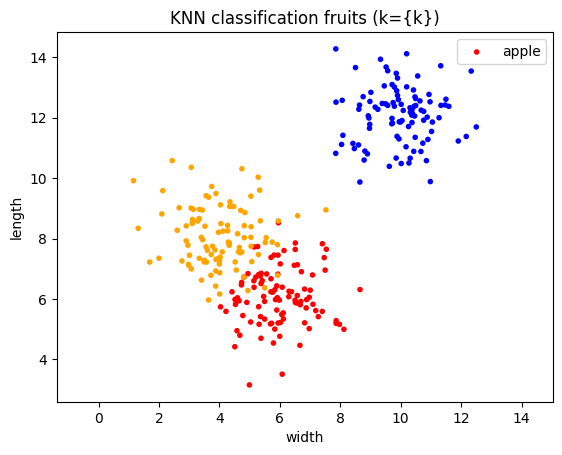

In [4]:
cmap = ['red', 'orange', 'blue']
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train, cmap=matplotlib.colors.ListedColormap(cmap), marker='.')
plt.axis('equal')
plt.title('KNN classification fruits (k={k})')
plt.xlabel('width')
plt.ylabel('length')
plt.legend(['apple','banana','Watermelon'])
plt.show()

In [76]:
from knn import KNN

In [77]:
knn = KNN(k=5)
knn.fit(X_train, Y_train)

In [54]:
new_fruits = np.array([[5, 6],[5, 8],[4, 4],[9, 8],[7, 10],[4, 6],[2, 9],[6, 8],[12, 11],[11, 8]])
results = knn.predict(new_fruits)

In [55]:
X_test, Y_test = generate_dataset(50)

In [85]:
Y_pred = knn.predict(X_test)
Y_pred = np.asarray(Y_pred)[:,0].astype(dtype='int')
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

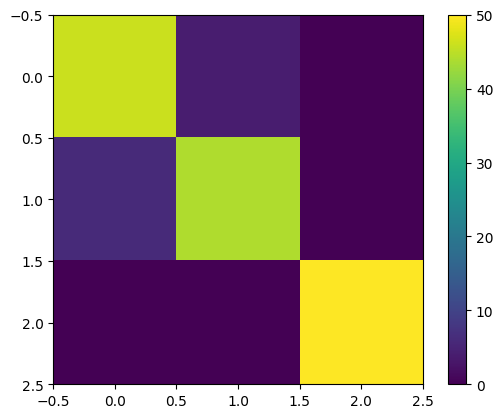

In [48]:
confusion_matrix = np.zeros((3,3))

for i in range(Y_pred.shape[0]):
    if Y_test[i] == 0 and Y_pred[i] == 0:
        confusion_matrix[0,0] += 1
    if Y_test[i] == 1 and Y_pred[i] == 1:
        confusion_matrix[1,1] += 1
    if Y_test[i] == 2 and Y_pred[i] == 2:
        confusion_matrix[2,2] += 1
    if Y_test[i] == 0 and Y_pred[i] == 1:
        confusion_matrix[0,1] += 1
    if Y_test[i] == 0 and Y_pred[i] == 2:
        confusion_matrix[0,2] += 1
    if Y_test[i] == 1 and Y_pred[i] == 0:
        confusion_matrix[1,0] += 1
    if Y_test[i] == 1 and Y_pred[i] == 2:
        confusion_matrix[1,2] += 1
    if Y_test[i] == 2 and Y_pred[i] == 0:
        confusion_matrix[2,0] += 1
    if Y_test[i] == 2 and Y_pred[i] == 1:
        confusion_matrix[2,1] += 1

confusion_matrix
plt.imshow(confusion_matrix)
plt.colorbar()
plt.show()

In [57]:
knn.evaluate(X_test, Y_test)

0.96

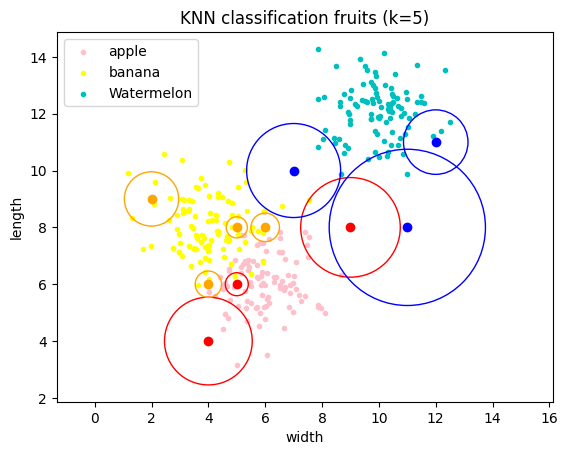

In [61]:
fig, ax = plt.subplots()
plt.scatter(X_train[:100,0], X_train[:100,1], c = 'pink', marker='.')
plt.scatter(X_train[100:200,0], X_train[100:200,1], c = 'yellow', marker='.')
plt.scatter(X_train[200:,0], X_train[200:,1], c = 'c', marker='.')
for i in range(len(new_fruits)):
    if (results[i][0] == 1):
        color = 'orange'
    elif (results[i][0] == 0):
        color = 'red'
    else:
        color = 'blue'
    plt.scatter(new_fruits[i,0], new_fruits[i,1], c = color, marker='o')
    circle = plt.Circle((new_fruits[i,0], new_fruits[i,1]), results[i][1], color=color, fill=False)
    ax.add_patch(circle)
plt.axis('equal')
plt.title(f'KNN classification fruits (k={5})')
plt.xlabel('width')
plt.ylabel('length')
plt.legend(['apple','banana','Watermelon'])
plt.show()

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

knn.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [59]:
knn.score(X_test, Y_test)

0.96